El dataset es transacciones de viviendas en Ames, Iowa (EE. UU.), entre los años 2006–2010.
que tiene menos ejemplos y variables, se usa frecuentemente en ejercicios de regresión, el objetivo típico es predecir el precio de venta de cada vivienda.  El dataset contiene muchas variables (más de 70), entre numéricas y categóricas. La mayoría describen características físicas, estructurales, de ubicación y estado de las viviendas.

Celda 1 – Importaciones

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
pd.set_option("display.max_columns", None)

Celda 2 – Cargar el dataset

In [4]:
data = pd.read_csv("/content/drive/MyDrive/TransaccionV.csv")

In [5]:
print("Dimensiones del dataset:", data.shape)
print("Número de columnas:", len(data.columns))
display(data.head())

Dimensiones del dataset: (2930, 82)
Número de columnas: 82


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


3. Selección de variable objetivo y features

In [6]:
y = data["SalePrice"]                     # variable objetivo
X = data.drop("SalePrice", axis=1)

In [7]:
print("Variables predictoras:", X.shape[1])
print("Ejemplos totales:", X.shape[0])

Variables predictoras: 81
Ejemplos totales: 2930


4. Preprocesamiento

In [8]:
for col in X.columns:
    if X[col].dtype == "object":
        X[col] = X[col].fillna("None")
    else:
        X[col] = X[col].fillna(X[col].median())

# Codificación de variables categóricas (One-Hot)
X = pd.get_dummies(X, drop_first=True)

In [9]:
print("Columnas después del One-Hot Encoding:", X.shape[1])

Columnas después del One-Hot Encoding: 278


5. División de los datos

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
print("Tamaño del set de entrenamiento:", X_train_scaled.shape)
print("Tamaño del set de prueba:", X_test_scaled.shape)

Tamaño del set de entrenamiento: (2344, 278)
Tamaño del set de prueba: (586, 278)


6. REGRESIÓN LINEAL MULTIVARIABLE

In [12]:

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

y_pred_lin = lin_reg.predict(X_test_scaled)
mse_lin = mean_squared_error(y_test, y_pred_lin)
print("MSE - Regresión Lineal Multivariable:", mse_lin)

MSE - Regresión Lineal Multivariable: 1241152933.333317


7. REGRESIÓN POLINÓMICA (grado 2)

In [13]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_train_scaled)
X_poly_test = poly.transform(X_test_scaled)

poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)

y_pred_poly = poly_reg.predict(X_poly_test)
mse_poly = mean_squared_error(y_test, y_pred_poly)
print("MSE - Regresión Polinómica (grado 2):", mse_poly)

MSE - Regresión Polinómica (grado 2): 1936813099.9102578


8. REGRESIÓN POR ECUACIÓN NORMAL

In [16]:

# Añadir columna de unos (sesgo)
X_b = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]

# Usar pseudoinversa para evitar el error "Singular matrix"
theta_best = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)

X_test_b = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]
y_pred_norm = X_test_b.dot(theta_best)

mse_norm = mean_squared_error(y_test, y_pred_norm)
print("✅ MSE - Ecuación Normal (pseudoinversa):", mse_norm)

✅ MSE - Ecuación Normal (pseudoinversa): 1241152933.3272402


9. DESCENSO DE GRADIENTE (para graficar costo)

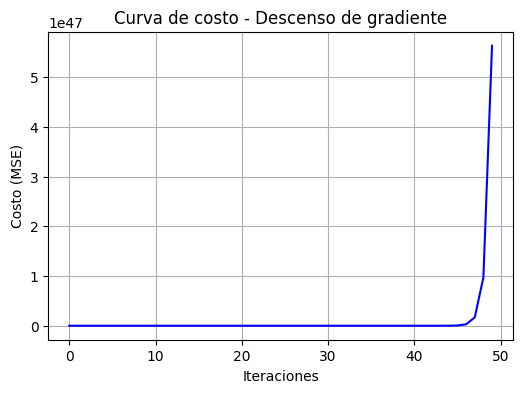

In [17]:
eta = 0.1      # tasa de aprendizaje
n_iterations = 50
m = len(X_train_scaled)

theta = np.random.randn(X_train_scaled.shape[1] + 1, 1)
X_b = np.c_[np.ones((m, 1)), X_train_scaled]
y_train_b = y_train.values.reshape(-1, 1)

cost_history = []

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y_train_b)
    theta = theta - eta * gradients
    cost = np.mean((X_b.dot(theta) - y_train_b) ** 2)
    cost_history.append(cost)

plt.figure(figsize=(6,4))
plt.plot(range(n_iterations), cost_history, color="blue")
plt.xlabel("Iteraciones")
plt.ylabel("Costo (MSE)")
plt.title("Curva de costo - Descenso de gradiente")
plt.grid(True)
plt.show()

10. COMPARACIÓN DE MODELOS

,Modelo,MSE
0,Lineal Multivariable,1.241153e+09
1,Polinómica (grado 2),1.936813e+09
2,Ecuación Normal,1.241153e+09


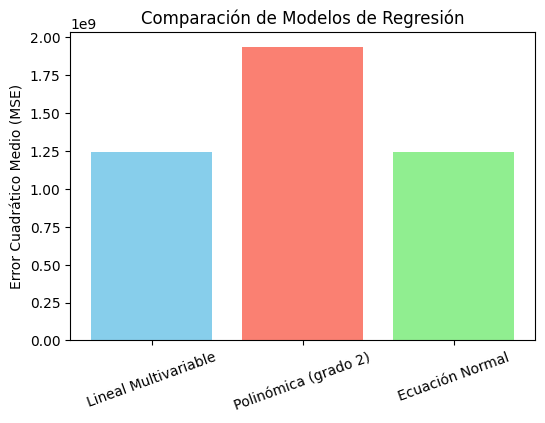

In [18]:
resultados = pd.DataFrame({
    "Modelo": ["Lineal Multivariable", "Polinómica (grado 2)", "Ecuación Normal"],
    "MSE": [mse_lin, mse_poly, mse_norm]
})
display(resultados)

plt.figure(figsize=(6,4))
plt.bar(resultados["Modelo"], resultados["MSE"], color=["skyblue", "salmon", "lightgreen"])
plt.ylabel("Error Cuadrático Medio (MSE)")
plt.title("Comparación de Modelos de Regresión")
plt.xticks(rotation=20)
plt.show()

11. PREDICCIONES (100 ejemplos)

In [19]:
predicciones = pd.DataFrame({
    "Real": y_test.values[:100],
    "Predicho_Lineal": y_pred_lin[:100],
    "Predicho_Polinomica": y_pred_poly[:100],
    "Predicho_Normal": y_pred_norm[:100]
})
display(predicciones.head(10))

# Guardar en CSV
predicciones.to_csv("predicciones_100.csv", index=False)
print("\nArchivo 'predicciones_100.csv' generado con éxito ✅")

,Real,Predicho_Lineal,Predicho_Polinomica,Predicho_Normal
0,161000,156642.183932,159036.159324,156642.183931
1,116000,109706.224625,120771.473421,109706.224624
2,196500,198807.894068,222548.750427,198807.894068
3,123600,133870.360219,93891.279071,133870.360219
4,126000,131998.199167,105269.473955,131998.199166
5,174190,193624.867484,218660.856555,193624.867485
6,200000,169073.354922,132392.006236,169073.354922
7,148500,145718.874648,129136.737867,145718.874648
8,88750,99043.651336,77244.479449,99043.651335
9,409900,362753.963177,313932.105305,362753.963177



Archivo 'predicciones_100.csv' generado con éxito ✅
